<a href="https://colab.research.google.com/github/ankithmenon/Stock-Market-Trading/blob/master/StockMarketTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy
import pandas_datareader as web
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn
import datetime as dt


In [0]:
style.use('ggplot')

# start = dt.datetime(2000, 1, 1)
# end = dt.datetime(2016, 12, 31)

# stock info taken from Tesla
# df = web.DataReader('TSLA', 'yahoo', start, end)  
# print(df.head())  # shows first 5 rows
# print(df.shape)
print("\n")
# print(df.tail())  # shows last 5 rows

# df.to_csv('tsla.csv')


df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)

# print(df.head())

print(df[['Open','High']].head())

df['Adj Close'].plot()
plt.show()


             High        Low       Open  ...    Volume  Adj Close      100ma
Date                                     ...                                
2010-06-29  25.00  17.540001  19.000000  ...  18766300  23.889999  23.889999
2010-06-30  30.42  23.299999  25.790001  ...  17187100  23.830000  23.860000
2010-07-01  25.92  20.270000  25.000000  ...   8218800  21.959999  23.226666
2010-07-02  23.10  18.709999  23.000000  ...   5139800  19.200001  22.220000
2010-07-06  20.00  15.830000  20.000000  ...   6866900  16.110001  20.998000

[5 rows x 7 columns]


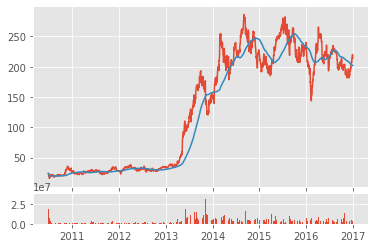

In [48]:
style.use('ggplot')
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)

# 100ma col added. This col is mean of current row and 99 prev rows of Adj Close  values
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
# df.dropna(inplace=True)  # this drops all rows having NaN columns. First 100 cols will have NaN because there is no prev cols for it
# to prevent this, we add min_periods = 0  option above. Every row takes Adj Close value average now (not just average of 100)

print(df.head())

# graph the dataframe just using Matplotlib.  (using pd.plot() uses Pandas and matplotlib)
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()



